In [206]:
#importamos pandas para trabajar el data_frame
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status,years_experience,skills_match_percent,num_certifications,internship_completed,interview_score,company_tier,job_competition_level
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,3,98,1,0,94,Mid,Medium
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4,88,1,1,54,MNC,Low
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,2,41,1,1,82,Startup,Low
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,4,41,0,0,50,MNC,High
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,4,67,0,0,67,Mid,High


In [207]:
#Juntamos todas las cat_features
categorical_features = ['gender','ssc_board','hsc_board','hsc_subject','undergrad_degree','work_experience',
    'specialisation','company_tier','job_competition_level']
#Planteamos cuales seran nuestros datos de entrada y sera el de salida
x = df.drop('status',axis=1)
y = df['status']

In [208]:
from sklearn.model_selection import train_test_split

#Spliteamos los datos para entrenar al modelo
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7, random_state=42)
x_train

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,years_experience,skills_match_percent,num_certifications,internship_completed,interview_score,company_tier,job_competition_level
198,F,67.00,Central,70.0,Central,Commerce,65.0,Others,No,88.00,Mkt&HR,71.96,2,57,4,0,75,Mid,High
82,M,63.00,Central,67.0,Central,Commerce,74.0,Comm&Mgmt,No,82.00,Mkt&Fin,60.44,3,41,1,1,79,Startup,Medium
65,M,54.00,Others,47.0,Others,Science,57.0,Comm&Mgmt,No,89.69,Mkt&HR,57.10,3,96,2,1,66,Mid,High
109,M,52.00,Central,63.0,Others,Science,65.0,Sci&Tech,Yes,86.00,Mkt&HR,56.09,2,77,4,0,97,Mid,Medium
182,M,52.00,Others,65.0,Others,Arts,57.0,Others,Yes,75.00,Mkt&Fin,59.81,2,76,3,1,95,Mid,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,M,61.08,Others,50.0,Others,Science,54.0,Sci&Tech,No,71.00,Mkt&Fin,65.69,2,88,5,1,62,MNC,High
14,M,62.00,Central,47.0,Central,Commerce,50.0,Comm&Mgmt,No,76.00,Mkt&HR,54.96,1,83,4,0,98,Startup,High
92,F,60.23,Central,69.0,Central,Science,66.0,Comm&Mgmt,No,72.00,Mkt&Fin,59.47,1,80,4,0,66,Mid,High
179,F,77.80,Central,64.0,Central,Science,64.2,Sci&Tech,No,75.50,Mkt&HR,72.14,0,74,4,1,52,Mid,Medium


In [209]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#Asignamos un preproceso para manejar de mejor manera la data que sea texto
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_features)
    ],
    remainder='passthrough'
)
#Creamos el modelo usando un pipeline, el preprocesamiento y el tipo de clasificador
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',KNeighborsClassifier(n_neighbors=15))
])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
#Muestra el score del modelo
model.score(x_test,y_test)

0.8

In [210]:
#guardamos el modelo con joblib
import joblib
joblib.dump(model,'job_model.joblib')

['job_model.joblib']

In [211]:
#Carga el modelo en ML_model
ML_model = joblib.load('job_model.joblib')

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Not Placed       0.90      0.43      0.58        21
      Placed       0.78      0.98      0.87        44

    accuracy                           0.80        65
   macro avg       0.84      0.70      0.72        65
weighted avg       0.82      0.80      0.78        65



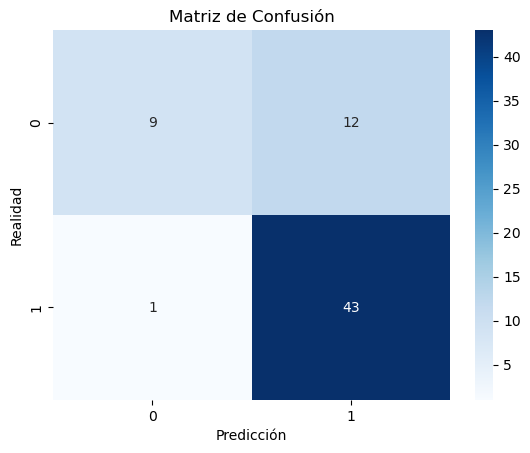

In [212]:
#Hacemos un reporte para ver que tan preciso fue nuestro modelo
import seaborn as sns
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()